 ## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. 

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Importing the Libraries

In [10]:

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

### Read the data

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Info of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Shape of the data

In [5]:
data.shape

(25, 2)

### Checking Missing Values from the data

In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Plotting the data
Plotting the data w.r.t distribution of scores

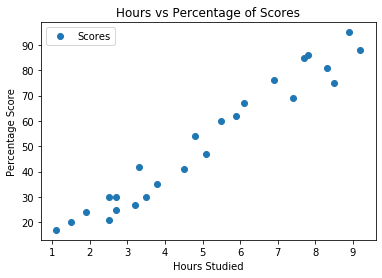

In [7]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage of Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Preparing the Data 

In [8]:
X = data.iloc[:, :-1].values  # X stands for Features
y = data.iloc[:, 1].values  #y stands for labels

### Splitting Data
Now the data is splits into training data and testing data.We'll do this by using Scikit-Learn's built-in "train_test_split()" method.

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Training the data with Linear Regression Algorithm

In [23]:
from sklearn.linear_model import LinearRegression  
linearregressor = LinearRegression()  
linearregressor.fit(X_train, y_train) 

print("Training complete.")



Training complete.


### Plotting the linear Regression

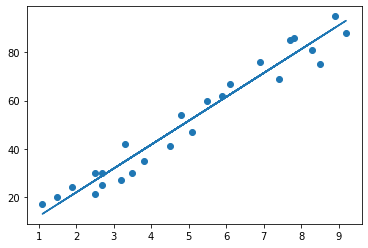

In [19]:
# Plotting the Linear Regression 
line = linearregressor.coef_*X+linearregressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Checking the quality of the model

## 1. Checking whether model is generalised model or not

In [12]:
print("predicted value for training data:",linearregressor.score(X_train,y_train))
print("predicted value for testing data:",linearregressor.score(X_test,y_test))
print("Intercept of the model:",linearregressor.intercept_)
print("Coefficcient of Regression:",linearregressor.coef_)

predicted value for training data: 0.9515510725211553
predicted value for testing data: 0.9454906892105356
Intercept of the model: 2.018160041434683
Coefficcient of Regression: [9.91065648]


## 2. Making Predictions

In [13]:
print(X_test) # Testing data - In Hours
y_pred = linearregressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## 3. Comparing Actual  v/s Preditcted

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## 4.Evaluating the model


In [15]:
from sklearn import metrics  
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Square Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Square Error: 4.6474476121003665


## 5. Deploying the model
# User Interaction Test

In [25]:
hours = [[9.25]]
own_pred = linearregressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538
